# Comparison of Boercker and More Ornsten-Zernike 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.hnc import  Integral_Equation_Solver as OZ
from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


ModuleNotFoundError: No module named 'mendeleev'


## Comparison to Shaffer

In [18]:
Γi = 20
Γe = 10

Ti = 1*eV_to_AU
Te = Γi/Γe*Ti
print(f"T_i = {Ti*AU_to_K:0.2f} [K]")
print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Zi, Ze = 1, 1

ri = Zi**2/Ti/Γi
re = Ze**2/Te/Γe

ni = n_from_rs(ri)
ne = n_from_rs(re)

rei = rs_from_n(ni + ne)

m_i = m_e*50

Qsquare_matrix = np.array( [[Ze**2, Zi*Ze ],[Zi*Ze, Zi**2]])
Qsquare_matrix


T_i = 11604.53 [K]
T_e = 23209.05 [K]


array([[1, 1],
       [1, 1]])

In [19]:
n_in_rs_array = np.array([ 3/(4*π*re**3/rei**3), 3/(4*π*ri**3/rei**3)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])

κ_screen = 0
κ_multiscale = 1

R_max, N_bins = 10, 500
num_iterations = 1e4
dst_type = 4

In [20]:
# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=κ_screen, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, 
          use_U00_svt_correction=False, dst_type = dst_type)
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))
# iet.U_s_k_matrix[1,0] *= Ti/Te
# iet.U_s_k_matrix[0,1] *= Ti/Te

# iet.set_all_matrices_from_Usk(iet.U_s_k_matrix)


iet.HNC_solve(num_iterations=num_iterations, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20,dont_check=False)

0: Initial condition Total Error: 6.351e-01
1: Change in U_r: 3.468e-03, Total Error: 6.237e-01
2: Change in U_r: 3.403e-03, Total Error: 6.127e-01
3: Change in U_r: 3.341e-03, Total Error: 6.022e-01
4: Change in U_r: 3.282e-03, Total Error: 5.921e-01
5: Change in U_r: 3.225e-03, Total Error: 5.824e-01
6: Change in U_r: 3.170e-03, Total Error: 5.730e-01
7: Change in U_r: 3.117e-03, Total Error: 5.640e-01
8: Change in U_r: 3.066e-03, Total Error: 5.553e-01
9: Change in U_r: 3.017e-03, Total Error: 5.470e-01
10: Change in U_r: 2.970e-03, Total Error: 5.389e-01
11: Change in U_r: 2.924e-03, Total Error: 5.311e-01
12: Change in U_r: 2.880e-03, Total Error: 5.236e-01
13: Change in U_r: 2.837e-03, Total Error: 5.163e-01
14: Change in U_r: 2.796e-03, Total Error: 5.093e-01
15: Change in U_r: 2.756e-03, Total Error: 5.025e-01
16: Change in U_r: 2.717e-03, Total Error: 4.958e-01
17: Change in U_r: 2.679e-03, Total Error: 4.894e-01
18: Change in U_r: 2.642e-03, Total Error: 4.831e-01
19: Change 

0

In [21]:
# Old solver
Tei = (Te*m_i + Ti*m_e)/(m_e + m_i) 
T_SVT_matrix = np.array( [[Te, Tei ],[Tei, Ti  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))
# oz.set_all_matrices_from_csk(oz.c_s_k_matrix)

oz.HNC_solve(num_iterations=num_iterations, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 7.379e+01
1: Change in c_r: 7.769e-02, HNC Error: 5.189e-02, Total Error: 6.700e+01
2: Change in c_r: 7.610e-02, HNC Error: 4.543e-02, Total Error: 6.082e+01
3: Change in c_r: 7.458e-02, HNC Error: 4.194e-02, Total Error: 5.521e+01
4: Change in c_r: 7.313e-02, HNC Error: 3.950e-02, Total Error: 5.011e+01
5: Change in c_r: 7.173e-02, HNC Error: 3.772e-02, Total Error: 4.547e+01
6: Change in c_r: 7.039e-02, HNC Error: 3.635e-02, Total Error: 4.126e+01
7: Change in c_r: 6.911e-02, HNC Error: 3.531e-02, Total Error: 3.744e+01
8: Change in c_r: 6.787e-02, HNC Error: 3.436e-02, Total Error: 3.397e+01
9: Change in c_r: 6.668e-02, HNC Error: 3.367e-02, Total Error: 3.082e+01
10: Change in c_r: 6.553e-02, HNC Error: 3.302e-02, Total Error: 2.797e+01
11: Change in c_r: 6.442e-02, HNC Error: 3.257e-02, Total Error: 2.538e+01
12: Change in c_r: 6.336e-02, HNC Error: 3.193e-02, Total Error: 2.303e+01
13: Change in c_r: 6.233e-02, HNC Error: 3.183e-02, Total Error: 

0

In [22]:
# Old solver
svt = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='svt', dst_type = dst_type)
svt.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-svt.r_array[np.newaxis,np.newaxis,:]*κ_screen))
# svt.set_all_matrices_from_csk(svt.c_s_k_matrix)

svt.HNC_solve(num_iterations=num_iterations, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 7.343e+01
1: Change in c_r: 6.896e-02, HNC Error: 5.106e-02, Total Error: 6.670e+01
2: Change in c_r: 6.756e-02, HNC Error: 4.444e-02, Total Error: 6.057e+01
3: Change in c_r: 6.623e-02, HNC Error: 4.057e-02, Total Error: 5.500e+01
4: Change in c_r: 6.496e-02, HNC Error: 3.785e-02, Total Error: 4.994e+01
5: Change in c_r: 6.374e-02, HNC Error: 3.596e-02, Total Error: 4.534e+01
6: Change in c_r: 6.258e-02, HNC Error: 3.433e-02, Total Error: 4.115e+01
7: Change in c_r: 6.147e-02, HNC Error: 3.325e-02, Total Error: 3.736e+01
8: Change in c_r: 6.040e-02, HNC Error: 3.221e-02, Total Error: 3.391e+01
9: Change in c_r: 5.938e-02, HNC Error: 3.144e-02, Total Error: 3.077e+01
10: Change in c_r: 5.841e-02, HNC Error: 3.093e-02, Total Error: 2.793e+01
11: Change in c_r: 5.747e-02, HNC Error: 3.028e-02, Total Error: 2.535e+01
12: Change in c_r: 5.657e-02, HNC Error: 2.992e-02, Total Error: 2.301e+01
13: Change in c_r: 5.570e-02, HNC Error: 2.962e-02, Total Error: 

0

In [23]:
# iet.plot_species_convergence_c(n_slices = len(iet.h_r_matrix_list[::100]))

In [8]:
# svt.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::100]))

In [9]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
# ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
# ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
# plt.legend(loc='upper right')

### Data from Nathaniel and Scott

In [25]:
from pandas import read_csv

# gii_data = read_csv("Shaffer2017_Fig2a_ii.txt", delim_whitespace=True, header=2)
# gei_data = read_csv("Shaffer2017_Fig2a_ei.txt", delim_whitespace=True, header=2)
# gee_data = read_csv("Shaffer2017_Fig2a_ee.txt", delim_whitespace=True, header=2)
# gii_data = read_csv("Shaffer2017_Fig2b_ii.txt", delim_whitespace=True, header=2)
# gei_data = read_csv("Shaffer2017_Fig2b_ei.txt", delim_whitespace=True, header=2)
# gee_data = read_csv("Shaffer2017_Fig2b_ee.txt", delim_whitespace=True, header=2)
gii_data = read_csv("Shaffer2017_Fig2c_ii.txt", delim_whitespace=True, header=2)
gei_data = read_csv("Shaffer2017_Fig2c_ei.txt", delim_whitespace=True, header=2)
gee_data = read_csv("Shaffer2017_Fig2c_ee.txt", delim_whitespace=True, header=2)


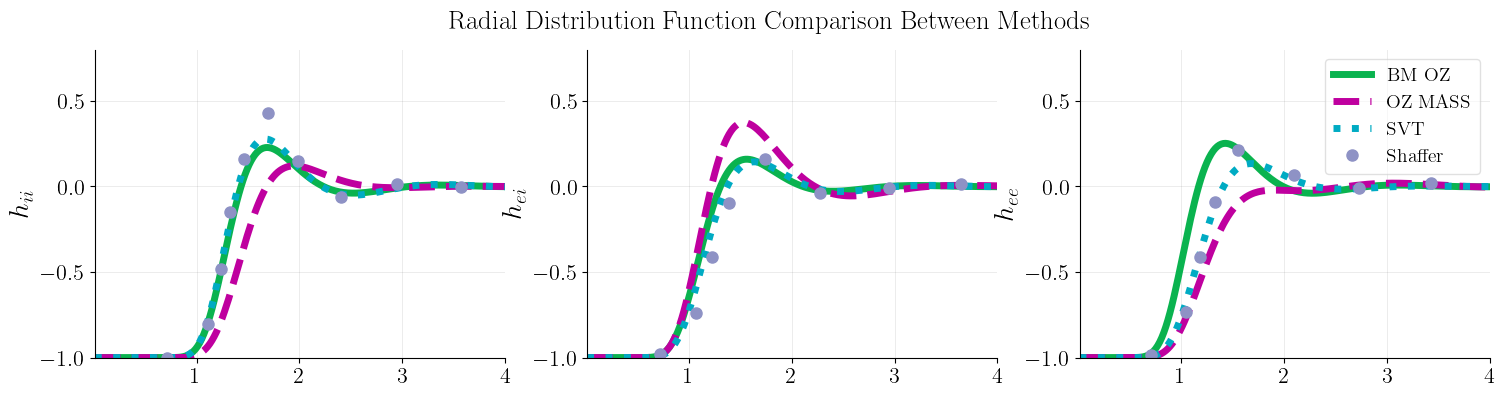

In [26]:
fig, axs = plt.subplots(1,3, figsize=(18,4))
fig.suptitle("Radial Distribution Function Comparison Between Methods")

ax = axs[0]
ax.plot(iet.r_array, iet.h_r_matrix[1,1],'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[1,1],'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[1,1],':', label="SVT", linewidth=5)
ax.plot(gii_data['r/a'], gii_data['gii']-1,'o', label="Shaffer")
ax.set_ylabel(r'$h_{ii}$')

ax = axs[1]
ax.plot(iet.r_array, iet.h_r_matrix[0,1],'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[0,1],'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[0,1],':', label="SVT", linewidth=5)
ax.plot(gei_data['r/a'], gei_data['gei']-1,'o', label="Shaffer")
ax.set_ylabel(r'$h_{ei}$')


ax = axs[2]
ax.plot(iet.r_array, iet.h_r_matrix[0,0],'-', label='BM OZ',linewidth=5)
# ax.plot(iet.r_array, Te/Ti*iet.heff_r_matrix[0,0],'--', label=r'BM OZ $\beta_i/\beta_e h_{eff}$',linewidth=5)
# ax.plot(iet.r_array, +(1 - Te/Ti)*iet.fee_r,'--', label=r'$(1-\beta_i/\beta_e)f_{ee}$',linewidth=5)
# ax.plot(iet.r_array, Te/Ti*iet.heff_r_matrix[0,0] + (1 - Te/Ti)*iet.fee_r,'--', label=r'$\beta_i/\beta_e h_{eff} + (1-\beta_i/\beta_e)f_{ee})$',linewidth=5)
# ax.plot(iet.r_array, iet.get_h_matrix_from_heff_matrix(iet.heff_r_matrix, k_space=False)[0,0],'--', label=r'$answer?$',linewidth=5)

ax.plot(oz.r_array, oz.h_r_matrix[0,0],'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[0,0],':', label="SVT", linewidth=5)
ax.plot(gee_data['r/a'], gee_data['gee']-1,'o', label="Shaffer")
ax.set_ylabel(r'$h_{ee}$')

for ax in axs:
    ax.set_xlim(1e-2,4)
    # ax.set_xscale('log')
    ax.set_ylim(-1,0.8)
ax.legend()

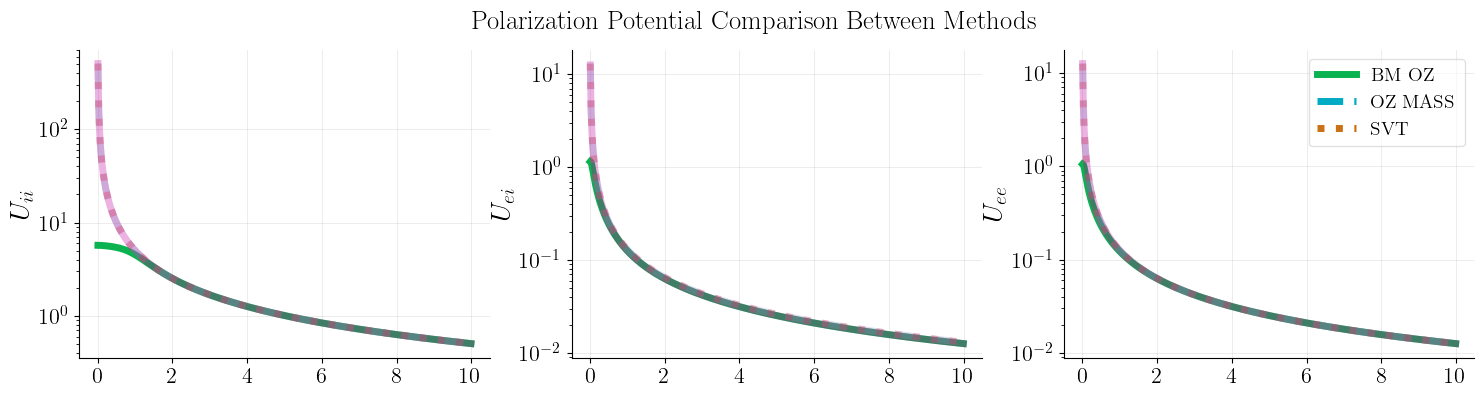

In [12]:
fig, axs = plt.subplots(1,3, figsize=(18,4))
fig.suptitle("Polarization Potential Comparison Between Methods")

ax = axs[0]
ax.plot(iet.r_array, iet.β_list[1]*iet.U_r_matrix[1,1],'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.β_list[1]*iet.u_r_matrix[1,1],'-',linewidth=5,alpha=0.3)
ax.plot(oz.r_array, oz.c_r_matrix[1,1],'--', label="OZ MASS",linewidth=5)
ax.plot(oz.r_array, oz.βu_r_matrix[1,1],'--',linewidth=5,alpha=0.3)
ax.plot(svt.r_array, svt.c_r_matrix[1,1],':', label="SVT", linewidth=5)
ax.plot(svt.r_array, svt.βu_r_matrix[1,1],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$U_{ii}$')

ax = axs[1]
ax.plot(iet.r_array, iet.β_list[0]*iet.U_r_matrix[0,1],'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.β_list[0]*iet.u_r_matrix[0,1],'-',linewidth=5,alpha=0.3)
ax.plot(oz.r_array, oz.c_r_matrix[0,1],'--', label="OZ MASS",linewidth=5)
ax.plot(oz.r_array, oz.βu_r_matrix[0,1],'--',linewidth=5,alpha=0.3)
ax.plot(svt.r_array, svt.c_r_matrix[0,1],':', label="SVT", linewidth=5)
ax.plot(svt.r_array, svt.βu_r_matrix[0,1],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$U_{ei}$')


ax = axs[2]

ax.plot(iet.r_array, iet.β_list[0]*iet.U_r_matrix[0,0],'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.β_list[0]*iet.u_r_matrix[0,0],'-',linewidth=5,alpha=0.3)
ax.plot(oz.r_array, oz.c_r_matrix[0,0],'--', label="OZ MASS",linewidth=5)
ax.plot(oz.r_array, oz.βu_r_matrix[0,0],'--',linewidth=5,alpha=0.3)
ax.plot(svt.r_array, svt.c_r_matrix[0,0],':', label="SVT", linewidth=5)
ax.plot(svt.r_array, svt.βu_r_matrix[0,0],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$U_{ee}$')

for ax in axs:
#     ax.set_xlim(0,3)
    # ax.set_ylim(0,None)
    ax.set_yscale('log')
ax.legend()

In [13]:
stop

NameError: name 'stop' is not defined


### Single Species Check

In [ ]:
# n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
# T_AU_array = np.array([Te, Ti])
# mass_array = np.array([m_e, m_i])
# iet = IET(1, n_in_rs_array[0:1], T_AU_array[0:1], mass_array[0:1], κ_screen=0 )

# iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
#         alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
# iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::10]))

In [ ]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0])


## Check Michael OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [ ]:
Γ11 = 20

T1 = 10*eV_to_AU
T2 = 10*eV_to_AU

Z1, Z2 = 1, 3
x1, x2 = 0.9, 0.1

r1 = Z1**2/T1/Γ11

n1 = n_from_rs(r1)

n = n1/x1
n2 = n*x2
r2 = rs_from_n(n2)
r12 = rs_from_n(n1 + n2)

print(f"T_1 = {T1*AU_to_K:0.2f} [K]")
print(f"T_2 = {T2*AU_to_K:0.2f} [K]")

m_1 = m_e*1
m_2 = m_e*1

Qsquare_matrix = np.array( [[Z1**2, Z1*Z2 ],[Z1*Z2, Z2**2]])
Qsquare_matrix


In [ ]:
# n_in_rs_array = 0.9*np.array([ 3/(4*π), 3/(4*π*r2**3/r1**3)] )
n_in_rs_array = np.array([ 3/(4*π*r1**3/r12**3), 3/(4*π*r2**3/r12**3)] )
T_AU_array = np.array([T1, T2])
mass_array = np.array([m_1, m_2])

κ_screen = 0
κ_multiscale = 0.0

R_max, N_bins = 10, 500
dst_type =3

# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12 * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T12 = (T1*m_2 + T2*m_1)/(m_1 + m_2) 
T_SVT_matrix = np.array( [[T1, T12 ],[T12, T2  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [ ]:
iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
g12_data = read_csv("Diaw2016_Fig4_g12.txt", delim_whitespace=True, header=2)
g22_data = read_csv("Diaw2016_Fig4_g22.txt", delim_whitespace=True, header=2)


fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1,'b-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1,'b--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[1,0]+1,'r-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,0]+1,'r--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'k-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'k--', label="OZ MASS",linewidth=5)


g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'k+')
g11_data = read_csv("Diaw2016_Fig4_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'kx')


ax.plot(g12_data['r/a'], g12_data['g12(r)'],'r+')
ax.plot(g22_data['r/a'], g22_data['g22(r)'],'b+')

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.6)
ax.legend()

ax.set_title("Now digitize data and compare...")

In [ ]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
plt.legend(loc='upper right')

In [ ]:
test_HNC(iet)
# test_BMOZ(iet)

## Check OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [ ]:
Γe = 100
Te = 10*eV_to_AU

Ze = 1

re = Ze**2/Te/Γe

ne = n_from_rs(re)

print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Qsquare_matrix = np.array( [[Ze**2]])
Qsquare_matrix


In [ ]:
n_in_rs_array = np.array([ 3/(4*π)] )
T_AU_array = np.array([Te])
mass_array = np.array([m_e])

κ_screen = 2
κ_multiscale = 0.0

R_max, N_bins = 20, 1000
dst_type = 3

# New solver
iet = IET(1, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T_SVT_matrix = np.array( [[Te]]  )
oz = OZ(1, np.ones((1,1)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((1,1)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [ ]:
iet.HNC_solve(num_iterations=1e4, tol=1e-9, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
gii_data = read_csv("Bonitz2018_Fig3_Γ=100-HNC.txt", delim_whitespace=True, header=2)

fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=3)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=3)
ax.plot(gii_data['r/a'], gii_data['gii'],'k+', label="Bonitz 2018")

# ax.plot(svt.r_array, svt.h_r_matrix[1,1]+1,':', label="SVT", linewidth=5)

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.55)
ax.legend()

In [ ]:
from scipy.interpolate import interp1d
def test_BMOZ(iet):
    cosθ_space = np.linspace(-1,1, num=1000)
    r_space = np.linspace(iet.r_array[0],iet.r_array[-1]/2, num=200)

    cosθ_mesh, r_mesh = np.meshgrid(cosθ_space, r_space, indexing='ij')

    drdcosθ = (r_space[1]-r_space[0]) * (cosθ_space[1]-cosθ_space[0])
    geom = drdcosθ*r_space**2*2*π


    def integrate_f1_f2(r_input, r_array, f1, f2):
        f1_interp = interp1d(r_array, f1, fill_value='extrapolate', bounds_error=False)
        f2_interp = interp1d(r_array, f2, fill_value='extrapolate', bounds_error=False)

        r1 = r_mesh
        r2 = np.sqrt(r_mesh**2 + r_input**2 + 2*cosθ_mesh*r_mesh*r_input )
        return np.sum(geom*f1_interp(r1)*f2_interp(r2))

    def get_lhs_rhs_i_j(i,j):
        rhs = np.zeros_like(iet.r_array)
        lhs = np.zeros_like(iet.r_array)
        for k in range(iet.N_species):
            rhs += -iet.rho[k]*np.array( [integrate_f1_f2(r, iet.r_array, iet.h_r_matrix[i,k], iet.β_list[k]*iet.U_r_matrix[k,j]) for r in iet.r_array])

        lhs = iet.h_r_matrix[i,j] + iet.β_list[j]*iet.U_r_matrix[i,j]
        return lhs, rhs
    
    
    # Plot
    fig, ax = plt.subplots()

    for i in range(iet.N_species):
        for j in range(iet.N_species):
            color = colors[j + iet.N_species*i]
            rhs, lhs = get_lhs_rhs_i_j(i,j)
            ax.plot(iet.r_array, rhs,'-', color=color, label=f'rhs ({i},{j})')
            ax.plot(iet.r_array, lhs,'--',color=color, label=f'lhs ({i},{j})')
            # Error estimate
            error_est = np.linalg.norm(rhs-lhs)/np.linalg.norm(lhs)
            print("{0}-{1} Estimated total OZ error: {2:.3e}".format(i,j,error_est))

    
    ax.set_yscale('symlog',linthresh=0.001)
    ax.legend()
    ax.set_title("BM OZ test LHS vs RHS")
    ax.set_ylabel("OZ sides")
    ax.set_xlabel(r"$r/r_i$")

def test_HNC(iet):
    lhs = (iet.h_r_matrix + 1)
    rhs = np.exp( -iet.β_list[np.newaxis,:,np.newaxis]*iet.u_r_matrix + iet.h_r_matrix + iet.β_list[np.newaxis,:,np.newaxis]*iet.U_r_matrix )
    error = np.linalg.norm(lhs-rhs)/np.linalg.norm(lhs)
    print(f"HNC error: {error:0.3e}")

test_BMOZ(iet)
test_HNC(iet)

# iet.h_r_matrix  + iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix - iet.A_times_B(iet.h_r_matrix, iet.rho[:, np.newaxis,np.newaxis]*iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix)  